## Image denoising problem. 

**Aim:** To train an autoencoder to map noisy digits images to clean digits images.

### Load MNIST dataset and Generate noisy images

Run the below code to load and add noise to the original mnist images

In [0]:
import numpy as np
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

import numpy as np
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Plot the noisy images

Run the below code to plot the noisy images

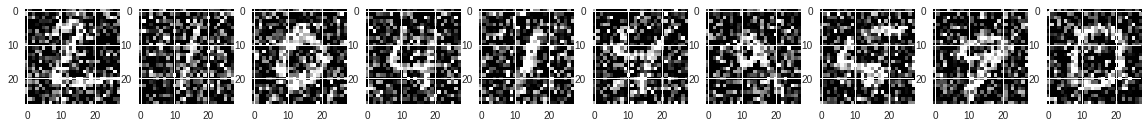

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

### Model

#### Consider the following while building the model.

1. Input layer with shape (28, 28, 1)
2. Conv2D with 32 filters with kernel size 3x3 with `relu` activation.
3. Max pooling with filter size 2x2 use padding `same` to retain the original image size.
4. Repeat step 2.
5. Repeat step 3.
6. Repeat step 2.
7. Upsampling with filter size 2x2.
8. Repeat step 2.
9. Repeat step 7.
10. Repeat step 2 with 1 filter to match the channels of image and `sigmoid` activation.
11. `binary_crossentropy` loss.


In [0]:
import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np

#1 Input layer
input_layer = keras.Input(shape=(28, 28, 1))

#2 Conv2D with 32 filters with kernel size 3x3 with relu activation.
conv1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(input_layer)

#3 Max pooling with filter size 2x2 use padding same to retain the original image size.
max1 = layers.MaxPooling2D(pool_size=(2,2), padding='same')(conv1)

#4 Repeat step 2.
conv2 = layers.Conv2D(32, (3,3),  padding='same', activation='relu')(max1)

#5 Repeat step 3.
max2 = layers.MaxPooling2D( padding='same', pool_size=(2,2))(conv2)

#6 Repeat step 2.
conv3 = layers.Conv2D(32, (3,3),  padding='same', activation='relu')(max2)

#7 Upsampling with filter size 2x2.
up_sample1 = layers.UpSampling2D(size=(2,2))(conv3)

#8 Repeat step 2.
conv4 = layers.Conv2D(32, (3,3),  padding='same', activation='relu')(up_sample1)

#9 Repeat step 7.
up_sample2 = layers.UpSampling2D(size=(2,2))(conv4)

#10 Repeat step 2 with 1 filter to match the channels of image and sigmoid activation.
conv5 = layers.Conv2D(1, (3,3),  padding='same', activation='sigmoid')(up_sample2)

model = Model(input_layer, conv5)
#11 binary_crossentropy loss.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 32)        0         
__________

### model.fit() to train with 100 epochs, batch_size as 1000.

with x_train_noisy as feature and x_train as label

with x_test_noisy as feature and x_test as label

In [12]:
model.fit(x_train_noisy, x_train,          
          validation_data=(x_test_noisy, x_test),
          epochs=20,
          batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1518 - acc: 0.8072 - val_loss: 0.1206 - val_acc: 0.8098
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1191 - acc: 0.8111 - val_loss: 0.1160 - val_acc: 0.8106
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1159 - acc: 0.8115 - val_loss: 0.1138 - val_acc: 0.8105
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1142 - acc: 0.8117 - val_loss: 0.1125 - val_acc: 0.8106
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1130 - acc: 0.8118 - val_loss: 0.1115 - val_acc: 0.8111
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1121 - acc: 0.8119 - val_loss: 0.1107 - val_acc: 0.8110
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1114 - acc: 0.8119 - val_loss: 0.1100 - val_acc

### Predict

Run the below code to get predictions of test set

In [0]:
denoised_imgs = model.predict(x_test_noisy)

### Plot 

Run the below code to check noised and denoised images. 

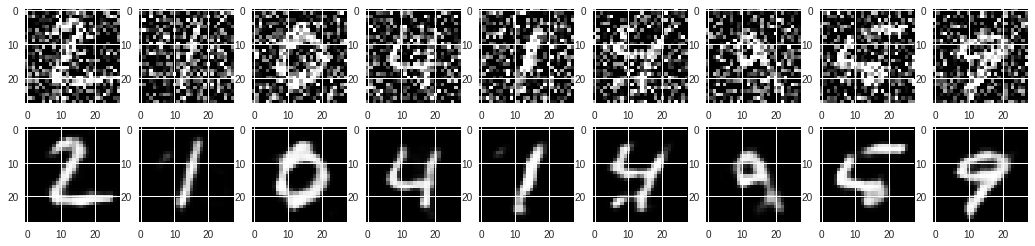

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display noisy images
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))

    # display denoised images
    ax = plt.subplot(2, n, i + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
plt.show()